# add liberaries

In [2]:
import tensorflow as tf

# load data

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [6]:
data_directory = './data/'

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_directory + 'train')

Found 2000 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()
batch = next(data_iterator)

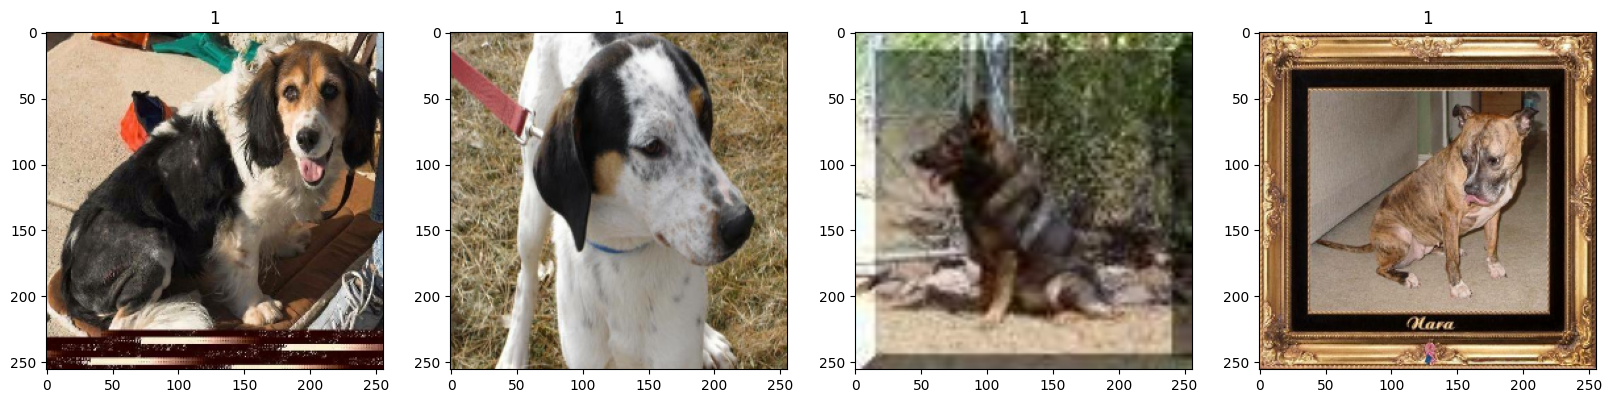

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(batch[1][idx])

# scale data

In [16]:
data = data.map(lambda x, y: (x/255, y))

SyntaxError: Lambda expression parameters cannot be parenthesized (211950061.py, line 1)

In [17]:
next(data.as_numpy_iterator())

(array([[[[3.79212610e-02, 4.57643978e-02, 4.18428294e-02],
          [1.84742641e-02, 2.63174027e-02, 2.23958325e-02],
          [6.34191185e-03, 6.34191185e-03, 6.34191185e-03],
          ...,
          [5.49984694e-01, 5.65670967e-01, 5.69592535e-01],
          [5.51256120e-01, 5.70863962e-01, 5.82628667e-01],
          [5.58915436e-01, 5.78523278e-01, 5.90287983e-01]],
 
         [[2.84773279e-02, 3.63204665e-02, 3.23988982e-02],
          [1.23161767e-02, 2.01593135e-02, 1.62377451e-02],
          [2.42034323e-03, 2.42034323e-03, 2.42034323e-03],
          ...,
          [5.41689634e-01, 5.57375908e-01, 5.61297476e-01],
          [5.48799098e-01, 5.68406940e-01, 5.80171645e-01],
          [5.54993868e-01, 5.74601710e-01, 5.86366415e-01]],
 
         [[1.63747147e-02, 2.42178533e-02, 2.02962831e-02],
          [1.23161767e-02, 2.01593135e-02, 1.62377451e-02],
          [5.89001225e-03, 5.89001225e-03, 5.89001225e-03],
          ...,
          [5.48567712e-01, 5.64253986e-01, 5.6817

# deep learning model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,387,649 (28.18 MB)

 Trainable params: 7,387,649 (28.18 MB)

 Non-trainable params: 0 (0.00 B)